# Capstone Project — The Battle of Neighbourhoods
### Introduction
Phoenix is the capital city of Arizona and is located in the central region of the state. People may know it for its year-round sun, desert beauty, and world-class resorts and golf, but as the fifth-largest city in the U.S., it also offers sophisticated urbanscapes, southwest culture and lots of outdoor adventure.
As the heart of Arizona, Phoenix having a huge amount of people working and living here. It is also the fifth-most populous city in the United States and the largest state capital by population, and the only state capital with a population of more than one million residents.
Also,  lots of foreign visitors and immigrates come to live here. It has a mix of culture and people came come to multiple countries to live and open a restaurant right here. With its diverse cultures, comes diverse food items. There are many restaurants in Phoenix , each belonging to different categories like Japanese, Italian, French, etc.
So as part of this project, we will list and visualize all major parts of Phoenix .

Questions that can be asked using the above-mentioned datasets

What is the best location in Phoenix for Brunch?

What places have the best restaurants in Phoenix ?

Which areas have a large/small number of Brunch Market?

Which is the best place to stay if I prefer Brunch?


### Data
For this project we need the following data :

For this project we need the following data :
Phoenix Resturants data that contains list Locality, Resturant name,Rating along with their latitude and longitude.

Data source : yelp kaggel dataset : "https://www.kaggle.com/yelp-dataset/yelp-dataset"
Description : This data set contains the required information. And we will use this data set to explore various locality of Phoenix.

Nearby places in each locality of Phoenix.
Data source : Fousquare API : "https://developer.foursquare.com/"
Description : By using this api we will get all the venues in each neighborhood.

### Approach
Collect the Phoenix city data from yelp Kaggle dataset
Using Foursquare API we will find all venues for each neighborhood in Phoenix.
Filter out all brunch in Phoenix.
Using aggregative rating for each restaurant to find the best places.
Visualize the Ranking of neighborhoods using folium library(python) to find the best place to open a new brunch


### FourSquare API
FourSquare API is used to find all venues for each neighborhood and filter that are nearby by locality.
Also, the process will use aggregative rating for each resturant to find the best places.
Visualize the Ranking of neighborhoods using folium library(python)


In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import bs4 as bs
import urllib.request
import folium # map rendering library
from folium import plugins
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

In [2]:
business_json_path = 'yelp_academic_dataset_business.json'
df_b = pd.read_json(business_json_path, lines=True)

In [3]:
df_b.describe()

,latitude,longitude,stars,review_count,is_open
count,209393.000000,209393.000000,209393.000000,209393.000000,209393.000000
mean,38.579934,-97.390217,3.538055,36.937505,0.806632
std,4.940448,16.718535,1.023543,123.343597,0.394940
min,21.497258,-158.025525,1.000000,3.000000,0.000000
25%,33.638658,-112.269476,3.000000,4.000000,1.000000
50%,36.147408,-111.743531,3.500000,9.000000,1.000000
75%,43.611693,-79.972679,4.500000,27.000000,1.000000
max,51.299943,-72.806550,5.000000,10129.000000,1.000000


# Data Cleaning
## remove the unwanted columns and rows from dataset
we only need Brunch restaruant which located in Phoenix

In [4]:
df_b = df_b.dropna()
df = df_b[df_b['city'] == 'Phoenix']
df = df[df['categories'].str.contains('Brunch')]
df = df[df['review_count'] >= 30]
df = df[['name','address','postal_code','latitude','longitude','stars','review_count','attributes','categories','hours']]
df.reset_index(drop=True, inplace=True)
df.head()

,name,address,postal_code,latitude,longitude,stars,review_count,attributes,categories,hours
0,Crazy Jim's,"305 W Washington St, Ste 104",85003,33.448129,-112.077876,3.5,97,"{'BusinessAcceptsCreditCards': 'True', 'Caters...","Mediterranean, Pizza, Greek, Breakfast & Brunc...","{'Monday': '0:0-0:0', 'Tuesday': '6:30-14:30',..."
1,stonegrill,5350 East Marriott Drive,85054,33.683465,-111.965897,3.5,89,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Restaurants, Comfort Food, Nightlife, Mexican,...","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'..."
2,Wrights at The Arizona Biltmore,2400 E Missouri Ave,85016,33.523241,-112.023321,4.0,139,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Restaurants, American (New), Breakfast & Brunch","{'Monday': '17:30-21:30', 'Tuesday': '17:30-21..."
3,Mamma Toledo's The Pie Hole,"15414 N 7th St, Ste 6",85022,33.626354,-112.066390,4.0,226,"{'WheelchairAccessible': 'True', 'Alcohol': ''...","Comfort Food, Waffles, Breakfast & Brunch, Foo...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:0', '..."
4,Lunch Box,2539 W Bethany Home Rd,85017,33.523727,-112.113875,3.0,60,"{'BusinessParking': '{'garage': False, 'street...","Diners, Breakfast & Brunch, Mexican, American ...","{'Monday': '6:0-16:0', 'Tuesday': '6:0-16:0', ..."


In [5]:
lats = df['latitude']
longs = df['longitude']
locations = np.stack((lats, longs), axis=1)

kmeans = KMeans(n_clusters=7, random_state=0).fit(locations)
clusters = kmeans.labels_
df['Cluster'] = clusters

df.head()

,name,address,postal_code,latitude,longitude,stars,review_count,attributes,categories,hours,Cluster
0,Crazy Jim's,"305 W Washington St, Ste 104",85003,33.448129,-112.077876,3.5,97,"{'BusinessAcceptsCreditCards': 'True', 'Caters...","Mediterranean, Pizza, Greek, Breakfast & Brunc...","{'Monday': '0:0-0:0', 'Tuesday': '6:30-14:30',...",0
1,stonegrill,5350 East Marriott Drive,85054,33.683465,-111.965897,3.5,89,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Restaurants, Comfort Food, Nightlife, Mexican,...","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...",3
2,Wrights at The Arizona Biltmore,2400 E Missouri Ave,85016,33.523241,-112.023321,4.0,139,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Restaurants, American (New), Breakfast & Brunch","{'Monday': '17:30-21:30', 'Tuesday': '17:30-21...",4
3,Mamma Toledo's The Pie Hole,"15414 N 7th St, Ste 6",85022,33.626354,-112.066390,4.0,226,"{'WheelchairAccessible': 'True', 'Alcohol': ''...","Comfort Food, Waffles, Breakfast & Brunch, Foo...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:0', '...",1
4,Lunch Box,2539 W Bethany Home Rd,85017,33.523727,-112.113875,3.0,60,"{'BusinessParking': '{'garage': False, 'street...","Diners, Breakfast & Brunch, Mexican, American ...","{'Monday': '6:0-16:0', 'Tuesday': '6:0-16:0', ...",0


In [6]:
Phoenix = folium.Map(location=[33.448, -112.074], zoom_start=10)
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink','lightgreen']

for lat, long, cluster in zip(df['latitude'], df['longitude'], df['Cluster']):
    folium.CircleMarker(
        [lat, long],
        radius=5,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(Phoenix)  

Phoenix

### List of top 10 of the restaruants
### only count restaurant with more than 4.5 star and ranked by review count
### show the Top 1% restaurant location on the map

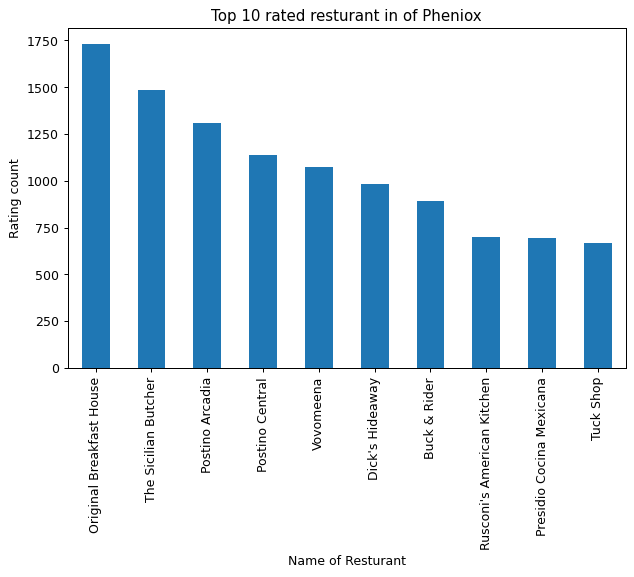

In [7]:
plt.figure(figsize=(8,5), dpi = 90)
plt.title('Top 10 rated resturant in of Pheniox')
df_best = df[df['stars'] >= 4.5].groupby('name')['review_count'].mean().nlargest(10)
df_best.plot(kind='bar')

plt.xlabel('Name of Resturant')
plt.ylabel('Rating count')
#displays the plot
plt.show()

In [8]:
Phoenix = folium.Map(location=[33.448, -112.074], zoom_start=10)

df_best = df[df['stars'] >= 4.5].groupby('name')['review_count'].mean().nlargest(int(df.size * 0.01))
myset = set([])
for lat, long, name in zip(df['latitude'], df['longitude'], df['name']):
    if name in df_best.index:
        if name not in myset:
            myset.add(name)
            folium.CircleMarker(
                [lat, long],
                radius=5,
                color='black',
                fill=True,
                fill_color='red').add_to(Phoenix)  

Phoenix 

location on map for these restaurants

### List of worest 10 of the restaruants
### only count restaurant with less than 2 star and ranked by review count
### show the Worest 1% restaurant location on the map

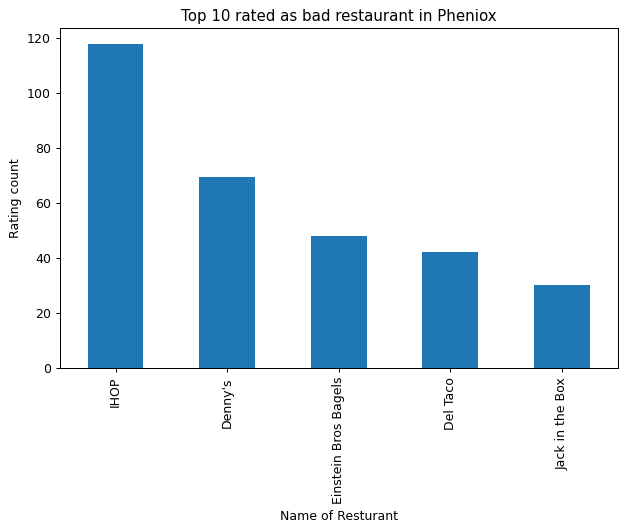

In [9]:
plt.figure(figsize=(8,5), dpi = 90)
plt.title('Top 10 rated as bad restaurant in Pheniox')
df_worest = df[df['stars'] <= 2].groupby('name')['review_count'].mean().nlargest(10)
df_worest.plot(kind='bar')

plt.xlabel('Name of Resturant')
plt.ylabel('Rating count')
#displays the plot
plt.show()

In [10]:
Phoenix = folium.Map(location=[33.448, -112.074], zoom_start=10)

df_worest = df[df['stars'] <= 2].groupby('name')['review_count'].mean().nlargest(int(df.size * 0.01))
myset = set([])
for lat, long, name in zip(df['latitude'], df['longitude'], df['name']):
    if name in df_worest.index:
        if name not in myset:
            #myset.add(name)
            folium.CircleMarker(
                [lat, long],
                radius=5,
                color='black',
                fill=True,
                fill_color='red').add_to(Phoenix)  

Phoenix 

IHOP has a lot stores which locate in Pheonix

### Getting population & zip-code for heap map

In [14]:
source = urllib.request.urlopen('https://www.arizona-demographics.com/zip_codes_by_population').read()
soup = bs.BeautifulSoup(source,'lxml')

table = soup.find('table')
table_rows = table.find_all('tr')

population = []

for tr in table_rows:
    td = tr.find_all('td')
    for i in td:
        row = [i.text.replace('\n','').strip().replace(',','') for i in td]

    if len(row[0]) > 5 :
         continue
    population.append(row)
population

[['1', '85364', '74382'],
 ['2', '85032', '72830'],
 ['3', '85225', '70066'],
 ['4', '85204', '69278'],
 ['5', '85301', '68300'],
 ['6', '85308', '66057'],
 ['7', '85142', '65881'],
 ['8', '85033', '65759'],
 ['9', '85281', '65283'],
 ['10', '85008', '62992'],
 ['11', '85041', '62491'],
 ['12', '85326', '60999'],
 ['13', '85035', '58327'],
 ['14', '85122', '57860'],
 ['15', '85345', '56790'],
 ['16', '85705', '56450'],
 ['17', '85037', '55567'],
 ['18', '85706', '55352'],
 ['19', '85710', '54663'],
 ['20', '85282', '54649'],
 ['21', '85201', '51519'],
 ['22', '85022', '51426'],
 ['23', '85283', '51119'],
 ['24', '85365', '50690'],
 ['25', '85383', '50308'],
 ['26', '85234', '49894'],
 ['27', '85207', '49727'],
 ['28', '85009', '49536'],
 ['29', '85338', '48517'],
 ['30', '85719', '48369'],
 ['31', '85379', '47791'],
 ['32', '85374', '47709'],
 ['33', '85140', '46804'],
 ['34', '85713', '46640'],
 ['35', '85042', '46570'],
 ['36', '85254', '46333'],
 ['37', '85339', '46251'],
 ['38', '8

In [15]:
populationdf = DataFrame (population,columns=['rank','zip','population'])
populationdf = populationdf[['zip','population']]
populationdf['latitude'] = 0.0
populationdf['longitude'] = 0.0
populationdf.head()

,zip,population,latitude,longitude
0,85364,74382,0.0,0.0
1,85032,72830,0.0,0.0
2,85225,70066,0.0,0.0
3,85204,69278,0.0,0.0
4,85301,68300,0.0,0.0


In [16]:
# geolocator = Nominatim(user_agent="geoapiExercises")
# def getLatandLong(zipcode):
#     geolocator = Nominatim(user_agent="geoapiExercises")
#     location = geolocator.geocode(zipcode)
#     #print(location.latitude, location.longitude)
#     return location
# #type(getLatandLong(20302).latitude)

# for i, row in populationdf.iterrows():
#     zip = row['zip']
#     location = getLatandLong(zip)
#     populationdf.at[i, 'latitude'] = location.latitude
#     populationdf.at[i, 'longitude'] = location.longitude
# populationdf
# #populationdf.to_csv (r'D:\School\Coursea\population.csv', index = False, header=True)


populationdf = pd.read_csv("population.csv")
populationdf.describe()

,zip,population,latitude,longitude
count,392.000000,392.000000,392.000000,392.000000
mean,85640.382653,17715.119898,37.031135,-77.157796
std,495.501515,18592.594601,8.687060,57.535922
min,84531.000000,3.000000,-29.669877,-114.787151
25%,85261.500000,1936.750000,33.321782,-112.059518
50%,85577.500000,9078.500000,33.813166,-110.959267
75%,86001.500000,32447.500000,40.965524,-1.353376
max,87824.000000,74382.000000,62.465399,123.724483


In [17]:
populationdf = populationdf[(populationdf['latitude'] > 33.448-0.25) & (populationdf['latitude'] < 33.448+0.25)]
populationdf = populationdf[(populationdf['longitude'] > -112.074-0.25) & (populationdf['longitude'] < -112.074+0.25)]
populationdf.describe()

,zip,population,latitude,longitude
count,68.000000,68.000000,68.000000,68.000000
mean,85162.088235,36580.352941,33.486509,-112.067948
std,136.934098,17206.538521,0.108926,0.134248
min,85003.000000,4772.000000,33.230051,-112.318188
25%,85030.250000,25386.000000,33.431978,-112.181226
50%,85213.000000,38870.000000,33.502345,-112.073978
75%,85283.250000,44812.500000,33.554575,-111.961895
max,85392.000000,72830.000000,33.675699,-111.837477


In [18]:
populationdf['size']=populationdf['population'].apply(lambda count:12 if count>=50000 else
                                         10 if count>=32448 and count<50000 else
                                         8 if count>=15000 and count<32448 else
                                         6 if count>=9079 and count<15000 else
                                         4 if count>=4000 and count<9079 else
                                         2 if count>=1937 and count<4000 else
                                         1 if count>=500 and count<1937 else
                                         0.1)
populationdf['color']=populationdf['population'].apply(lambda count:"Black" if count>=50000 else
                                         "green" if count>=32448 and count<50000 else
                                         "Orange" if count>=15000 and count<32448 else
                                         "darkblue" if count>=9079 and count<15000 else
                                         "red" if count>=4000 and count<9079 else
                                         "lightblue" if count>=1937 and count<4000 else
                                         "brown" if count>=500 and count<1937 else
                                         "grey")
populationdf

,zip,population,latitude,longitude,size,color
1,85032,72830,33.615376,-112.016833,12,Black
2,85225,70066,33.300305,-111.842073,12,Black
4,85301,68300,33.538419,-112.180747,12,Black
5,85308,66057,33.644563,-112.223791,12,Black
7,85033,65759,33.506820,-112.196397,12,Black
...,...,...,...,...,...,...
211,85012,7012,33.510662,-112.074073,4,red
213,85054,6896,33.650319,-111.934572,4,red
218,85004,6552,33.457927,-112.067175,4,red
222,85256,5862,33.540938,-111.876879,4,red


In [19]:
m = folium.Map(location=[33.448, -112.074], zoom_start=10)
#location=location[0:2000]
for index, row in populationdf.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                            popup=row['zip'],
                            radius=row['size'],
                            color='b',
                            fill=True,
                            fill_opacity=0.7,
                            fill_color=row['color'],
                           ).add_to(m)
m.save('LA collisions.html')
m

In [20]:
azm = folium.Map(location=[33.448, -112.074], zoom_start=10)
# convert to (n, 2) nd-array format for heatmap
location_data = populationdf[['latitude', 'longitude']].values
# plot heatmap
azm.add_child(plugins.HeatMap(location_data, radius=40))
azm.save('heatmap.html')
azm

In [21]:
# calcualte how many Brunches are there in a zipcode
dfzipcnt = df.groupby('postal_code')['name'].count().to_frame()
# dfzipcnt['zip'] = dt.index
# dfzipcnt = dfzipcnt[['zip','name']]
# dfzipcnt.columns = ['zip', 'count']

dfzipcnt = dfzipcnt.to_dict().get('name')
#dfzipcnt

In [22]:
populationdf['brunchCnt'] = 0
    
for i, row in populationdf.iterrows():
    zip = row['zip']
    p = dfzipcnt.get(str(zip), 0)
    if(p != 0):
        populationdf.at[i, 'brunchCnt'] = p
populationdf

,zip,population,latitude,longitude,size,color,brunchCnt
1,85032,72830,33.615376,-112.016833,12,Black,18
2,85225,70066,33.300305,-111.842073,12,Black,0
4,85301,68300,33.538419,-112.180747,12,Black,0
5,85308,66057,33.644563,-112.223791,12,Black,0
7,85033,65759,33.506820,-112.196397,12,Black,2
...,...,...,...,...,...,...,...
211,85012,7012,33.510662,-112.074073,4,red,18
213,85054,6896,33.650319,-111.934572,4,red,3
218,85004,6552,33.457927,-112.067175,4,red,42
222,85256,5862,33.540938,-111.876879,4,red,0


In [23]:
lowbrunchdf = populationdf[populationdf['population'] > 50000].sort_values(["brunchCnt", "population"], ascending = (True, False))
lowbrunchdf.head()

lowbrunchzipsetdf = lowbrunchdf['zip']

lowbrunchzipset = {'11111'}
for a in lowbrunchzipsetdf:
    lowbrunchzipset.add(str(a)) 
lowbrunchzipset.remove('11111')
#lowbrunchzipset

In [24]:
reviewdf = df_b[df_b['city'] == 'Phoenix']
reviewdf = reviewdf[reviewdf['categories'].str.contains('Restaurant')]
reviewdf = reviewdf[reviewdf['postal_code'].isin(lowbrunchzipset)]
reviewdf.reset_index(drop=True, inplace=True)
reviewdf.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,vjTVxnsQEZ34XjYNS-XUpA,Wetzel's Pretzels,"4550 East Cactus Rd, #KSFC-4",Phoenix,AZ,85032,33.602822,-111.983533,4.0,10,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...","Food, Pretzels, Bakeries, Fast Food, Restaurants","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."
1,LJyt1WlDeKWspiqljzIg7w,BonTerra Farm Market,4326 E Cactus Rd,Phoenix,AZ,85032,33.599800,-111.986952,2.5,4,0,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Italian, Restaurants, Food, Farmers Market, Am...","{'Monday': '8:0-20:0', 'Tuesday': '8:0-20:0', ..."
2,Jr1_Pt8TQihTISYc5RbKtw,Saenz Cleaning,,Phoenix,AZ,85032,33.636450,-112.011867,5.0,29,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Carpet Cleaning, Window Washing, Home Services...","{'Monday': '0:0-0:0', 'Tuesday': '7:0-18:0', '..."
3,zhVWu6mJXvFSKMNRv2P9gA,ATL Wings,"3320 W Southern Ave, Ste 120",Phoenix,AZ,85041,33.392179,-112.129793,3.0,47,1,"{'HasTV': 'True', 'Ambience': '{'touristy': Fa...","Restaurants, Chicken Wings","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
4,vtGwb-yl69LT96mHVllWeA,Satisfied Frog On Bell,2827 E Bell Rd,Phoenix,AZ,85032,33.640323,-112.021048,4.0,66,0,"{'OutdoorSeating': 'True', 'RestaurantsAttire'...","Restaurants, American (Traditional), Barbeque","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."


In [25]:
zipvote_set = {}
for i, row in reviewdf.iterrows():
    zipcode = str(row['postal_code'])
    review = row['review_count']
    if zipcode in zipvote_set:
        zipvote_set[zipcode] = zipvote_set[zipcode] + review
    else:
        zipvote_set[zipcode] = review
zipvote_set  

{'85032': 25842,
 '85041': 1643,
 '85008': 6471,
 '85035': 2243,
 '85033': 2183,
 '85037': 1979,
 '85308': 586,
 '85225': 35,
 '85283': 125,
 '85281': 34,
 '85301': 13}

In [26]:
populationdf['reviewcnt'] = 0
    
for i, row in populationdf.iterrows():
    zipcode = str(row['zip'])
    if(zipcode in zipvote_set):
        populationdf.at[i, 'reviewcnt'] = zipvote_set[zipcode]
populationdf = populationdf[populationdf['reviewcnt'] != 0]
populationdf.sort_values(by=['reviewcnt'], inplace=True,ascending=False)
populationdf

c:\users\zmtyo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,zip,population,latitude,longitude,size,color,brunchCnt,reviewcnt
1,85032,72830,33.615376,-112.016833,12,Black,18,25842
9,85008,62992,33.451324,-111.973993,12,Black,6,6471
12,85035,58327,33.476917,-112.172111,12,Black,1,2243
7,85033,65759,33.506820,-112.196397,12,Black,2,2183
16,85037,55567,33.495793,-112.256035,12,Black,0,1979
10,85041,62491,33.369522,-112.093982,12,Black,1,1643
5,85308,66057,33.644563,-112.223791,12,Black,0,586
22,85283,51119,33.377869,-111.973320,12,Black,0,125
2,85225,70066,33.300305,-111.842073,12,Black,0,35
8,85281,65283,33.425629,-111.936462,12,Black,0,34


In [27]:
populationdf['popbrunchRatio'] = 0.0
populationdf['reviewRatio'] = 0.0
for i, row in populationdf.iterrows():
    people = row['population']
    brunchCnt = 1 + row['brunchCnt']
    review = 1 + row['reviewcnt']
    populationdf.at[i, 'popbrunchRatio'] = people/brunchCnt
    populationdf.at[i, 'reviewRatio'] = review/people
    
populationdf.head()

c:\users\zmtyo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\zmtyo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,zip,population,latitude,longitude,size,color,brunchCnt,reviewcnt,popbrunchRatio,reviewRatio
1,85032,72830,33.615376,-112.016833,12,Black,18,25842,3833.157895,0.354840
9,85008,62992,33.451324,-111.973993,12,Black,6,6471,8998.857143,0.102743
12,85035,58327,33.476917,-112.172111,12,Black,1,2243,29163.500000,0.038473
7,85033,65759,33.506820,-112.196397,12,Black,2,2183,21919.666667,0.033212
16,85037,55567,33.495793,-112.256035,12,Black,0,1979,55567.000000,0.035633
